<div class='bar_title'></div>

*Data Driven Decisions in Practice (D3IP): Urban Analytics*

# Case Study: Predicting AirBnB Accomodation Prices

Gunther Gust & Nikolai Stein

Data Driven Decisions (D3) Group <br>
Center for Artificial Intelligence & Data Science <br>



<img src="images/d3.png" style="width:20%; float:left;" />

<img src="images/CAIDASlogo.png" style="width:20%; float:left;" />

## Note:
### Created by Amil Moranjkic (2624465), Batuhan Kalkan (2768939), Sait Samet Yigit (2770727) | All non underlined markdowns are from us.

Complete the case study outlined by the steps below. Remember to always comment your code and document your findings so that your notebook is easy to read and follow! (Apart from correctness, the style of the notebook will also affect your grade!)



# PART 1: Data Loading and Exploratory Data Analysis

<u>Insructions:

* Load the `airbnb.geojson` file into this notebook as a geodataframe
* Explore the content of each column of the geodataframe using methods of your choice (descriptive statistics, plots etc.). Describe your findings in the markdown cells.
* Create a plot that displays the location of the airbnb listings and the price. Add a basemap of San Diego to the plot.<u/>

In [25]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import seaborn as sns
import contextily as cx

from matplotlib.colors import LogNorm
from matplotlib.colors import BoundaryNorm

In [26]:
file_path = '/workspaces/case-study-1-urban-analytics-barculaamula/airbnb_listings.geojson'
gdf = gpd.read_file(file_path)
print(gdf.head())

   accommodates  bathrooms  bedrooms  beds  rt_Private_room  rt_Shared_room  \
0             5        2.0       2.0   2.0                0               0   
1             6        1.0       2.0   4.0                0               0   
2             2        1.0       1.0   1.0                1               0   
3             2        1.0       1.0   1.0                1               0   
4             2        1.0       1.0   1.0                1               0   

   pg_Condominium  pg_House  pg_Other  pg_Townhouse  price  \
0               0         1         0             0  425.0   
1               1         0         0             0  205.0   
2               0         0         0             0   99.0   
3               0         1         0             0   72.0   
4               0         1         0             0   55.0   

                      geometry  
0  POINT (-117.12971 32.75399)  
1  POINT (-117.25253 32.78421)  
2  POINT (-117.14121 32.75327)  
3  POINT (-117.15269

The head of the dataset shown provides details about Airbnb listings, captured in a GeoDataFrame. Below is an overview of key data columns and observations:

### Data Columns

- **accommodates**: Number of guests the listing can accommodate.
- **bathrooms, bedrooms, beds**: Specifies the quantity of bathrooms, bedrooms, and beds.
- **rt_Private_room, rt_Shared_room**: Binary indicators for private and shared rooms.
- **pg_Condominium, pg_House, pg_Other, pg_Townhouse**: Binary indicators for the type of property.
- **price**: Nightly price of the listing.
- **geometry**: Geographic coordinates of the listing.

### Key Observations

- The data includes both spatial information (`geometry`) and detailed attributes of each listing such as type and capacity.
- Listings vary in accommodation size and type, with prices ranging from $55 to $425.
- The structure supports analyses such as spatial distribution, pricing patterns, and property type trends.

In [27]:
gdf.describe() #This method provides a statistical summary of the numerical columns in the DataFrame.

accommodates    bathrooms     bedrooms         beds  rt_Private_room  \
count   6110.000000  6110.000000  6110.000000  6110.000000      6110.000000   
mean       4.220786     1.475286     1.589198     2.196399         0.298363   
std        2.840703     0.863803     1.136234     1.712917         0.457577   
min        1.000000     0.000000     0.000000     0.000000         0.000000   
25%        2.000000     1.000000     1.000000     1.000000         0.000000   
50%        4.000000     1.000000     1.000000     2.000000         0.000000   
75%        6.000000     2.000000     2.000000     3.000000         1.000000   
max       21.000000    10.000000    10.000000    16.000000         1.000000   

       rt_Shared_room  pg_Condominium    pg_House     pg_Other  pg_Townhouse  \
count     6110.000000     6110.000000  6110.00000  6110.000000   6110.000000   
mean         0.027987        0.090998     0.42144     0.087234      0.033879   
std          0.164949        0.287630     0.49383     0.282201      0.180932   
min          0.000000        0.000000     0.00000     0.000000      0.000000   
25%          0.000000        0.000000     0.00000     0.000000      0.000000   
50%          0.000000        0.000000     0.00000     0.000000      0.000000   
75%          0.000000        0.000000     1.00000     0.000000      0.000000   
max          1.000000        1.000000     1.00000     1.000000      1.000000   

             price  
count  6110.000000  
mean    215.967594  
std     277.549832  
min      18.000000  
25%      85.000000  
50%     139.000000  
75%     250.000000  
max    4900.000000

### Accommodation Capacity:
- **Capacity:** Listings can accommodate between 1 and 21 guests, showing a wide variance in accommodation options from individuals to larger groups.
- **Average Capacity:** 4 people, indicating that most accommodations are designed for families or small groups.

### Bathrooms:
- **Range of Bathrooms:** Varies between 0 and 10, indicating a wide diversity in listing types from simpler accommodations to luxury offerings.
- **Average:** About 1.48 bathrooms per listing, typical for standard apartments or houses.

### Bedrooms:
- **Range of Bedrooms:** from 0 to 10, with an average of about 1.59 bedrooms. This highlights that many listings are more suitable for single travelers or small families.

### Beds:
- **Range of Beds:** between 0 and 16, with an average of 2.20 beds. This suggests that many accommodations are designed to host multiple guests in one room or across multiple rooms.

### Room Types:
- **Private Rooms (rt_Private_room):**
  - On average, 30% of accommodations are private rooms. This room type offers guests privacy and is a frequently chosen option, especially for solo travelers or couples.
- **Shared Rooms (rt_Shared_room):**
  - Shared rooms make up only about 3% of the offerings. They are significantly less popular than private rooms, suggesting that most guests prefer privacy.

### Property Types:
- **Condominiums (pg_Condominium):**
  - Condominiums account for about 9% of the listings. This type of housing is popular in urban areas and often offers access to communal facilities like pools or gyms.
- **Houses (pg_House):**
  - Houses form the largest share of Airbnb listings at 42%. Many travelers seek the comfort and spaciousness of entire houses, especially suitable for families or larger groups.
- **Other Property Types (pg_Other):**
  - 9% of listings fall into the "Other" category, which could indicate a variety of unconventional or unique accommodations such as treehouses, tents, or boats.
- **Townhouses (pg_Townhouse):**
  - Townhouses make up 3% of the offerings. These are typically row-house-like dwellings that offer more space than apartments but are still centrally located.

### Pricing:
- **Price Range:** from $18 to $4900, with an average price of $216. This wide span reflects the broad range of accommodation types and locations, from simple rooms to luxurious estates.
- **Median Price:** $139, showing that half of the listings are priced below this point.
- **25%-75% Quantile:** from $85 to $250, indicating that most accommodations are affordable, although there are some high-priced exceptions that cater to the upper end of the market.

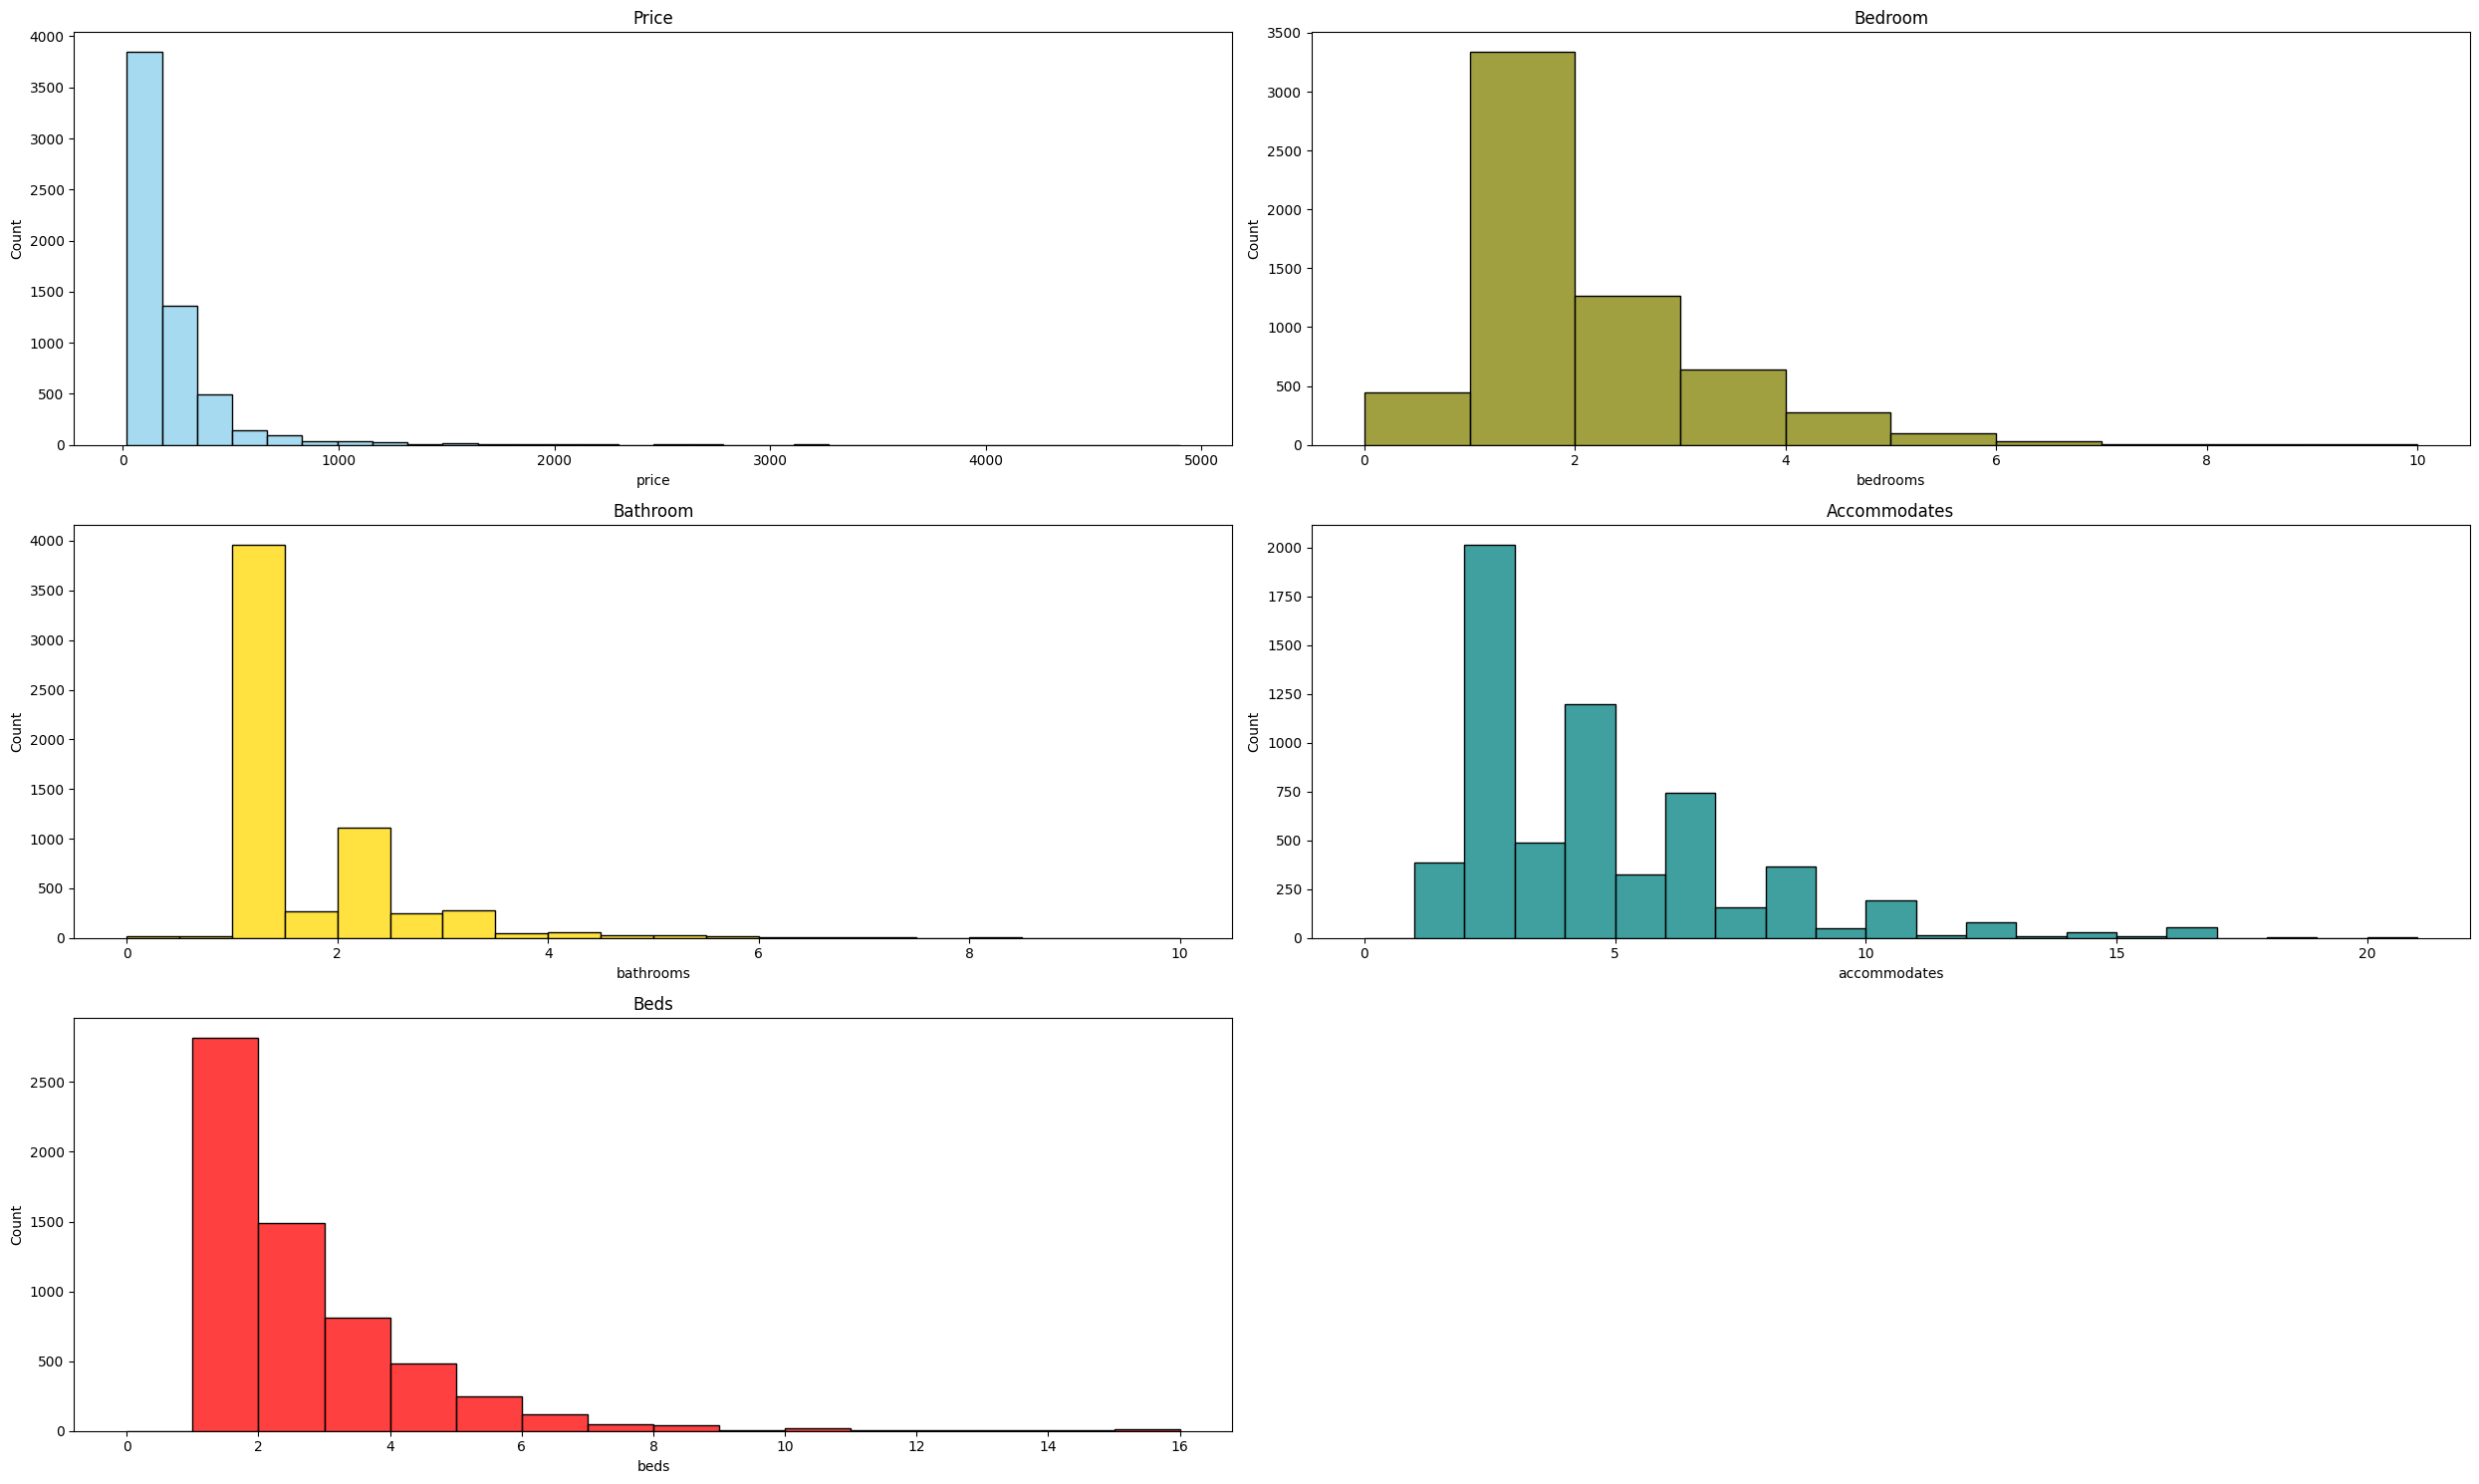

In [28]:
ig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 15))
sns.histplot(gdf['price'], bins=30, ax=axes[0, 0], color='skyblue').set_title('Price')
sns.histplot(gdf['bedrooms'], bins=np.arange(0, gdf['bedrooms'].max()+1, 1), ax=axes[0, 1], color='olive').set_title('Bedroom')
sns.histplot(gdf['bathrooms'], bins=np.arange(0, gdf['bathrooms'].max()+0.5, 0.5), ax=axes[1, 0], color='gold').set_title('Bathroom')
sns.histplot(gdf['accommodates'], bins=np.arange(0, gdf['accommodates'].max()+1, 1), ax=axes[1, 1], color='teal').set_title('Accommodates')
sns.histplot(gdf['beds'], bins=np.arange(0, gdf['beds'].max()+1, 1), ax=axes[2, 0], color='red').set_title('Beds')

axes[2, 1].set_axis_off()

plt.tight_layout()

### Price
- **Majority of Listings:** Most listings are priced below $1000, indicating a concentration of more budget-friendly options in San Diego.
- **Decline at Higher Prices:** There is a significant drop in the number of listings as the price increases, with very few listings priced above $2000. This suggests that luxury accommodations are much less common.

### Bathrooms
- **Most Common Configuration:** Most listings have 1 bathroom, with around 4000 listings falling into this category, making it the most common configuration.
- **Second and Third Most Common:** Listings with 2 bathrooms are the next most common, but significantly fewer, followed by those with 3 bathrooms. Listings with more than 3 bathrooms are rare.

### Bedrooms
- **Most Common Configuration:** Listings with 1 bedroom are the most prevalent, consistent with the high number of listings designed for smaller groups or couples.
- **Decrease with More Bedrooms:** The frequency of listings decreases as the number of bedrooms increases, with 2-bedroom listings being the second most common. Listings with more than 4 bedrooms are increasingly rare.

### Beds
- **Most Common Configuration:** Listings with 1 bed are the most common, followed by those with 2 beds, reflecting a market geared towards individuals or small families.
- **Decrease with More Beds:** The number of listings decreases significantly as the number of beds increases beyond 3, suggesting that larger accommodations are less common.

### Accommodates
- **Most Common Capacity:** A large number of listings accommodate 2 people, which is the most common capacity, likely catering to couples or solo travelers.
- **Decrease with Higher Capacity:** The frequency generally decreases as the capacity increases, with a noticeable amount of listings that can accommodate 4 and 6 people, which likely corresponds to family or group travel accommodations.
- **Very Large Groups:** Very few listings accommodate more than 10 people, indicating that very large group accommodations are uncommon.

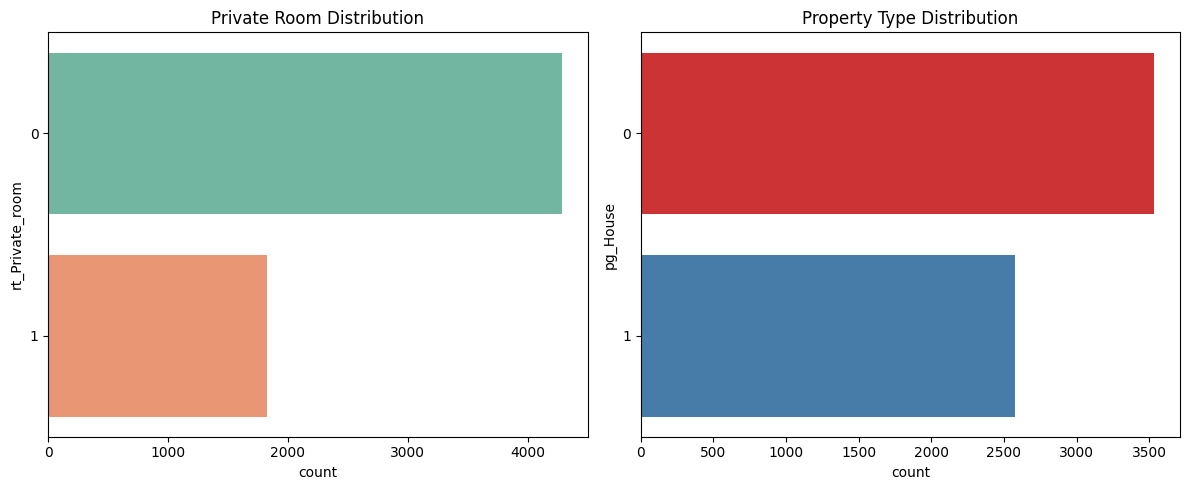

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(data=gdf, y='rt_Private_room', hue='rt_Private_room', ax=axes[0], palette='Set2', legend=False).set_title('Private Room Distribution')
sns.countplot(data=gdf, y='pg_House', hue='pg_House', ax=axes[1], palette='Set1', legend=False).set_title('Property Type Distribution')

plt.tight_layout()
plt.show()

### Private Room Distribution
- **Histogram Analysis:** The histogram displays two bars indicating the presence (1) or absence (0) of private rooms in listings.
- **Majority Without Private Rooms:** The majority of listings do not offer a private room (0), as indicated by the high count in the green bar. This suggests that entire places or shared rooms may be more common among Airbnb listings in San Diego.
- **Lower Count for Private Rooms:** The count for listings with private rooms (1) is lower, shown in orange. This indicates that while private rooms are available, they are less common than other types of accommodations.

### Property Type Distribution
- **Histogram Comparison:** This histogram compares the counts of two major property types: houses (red) and condominiums (blue).
- **Houses More Common:** Houses are significantly more common than condominiums, as the red bar is much higher than the blue bar. This suggests that houses are the predominant type of listing available in the Airbnb market in San Diego.
- **Fewer Condominiums:** Condominiums, while available, represent a smaller portion of the listings, indicated by the lower count in the blue bar.

### Insights
- **Room Type:** The dominance of listings without private rooms might indicate a market geared more towards renting entire properties or that shared room configurations are notably prevalent. This could appeal to travelers seeking more space or privacy, typical of vacation destinations.
- **Property Type:** The preference for houses over condominiums could be due to a variety of factors, including the desire for larger spaces, potentially with outdoor amenities like gardens or pools, which are popular in vacation rentals. The fewer condominiums might be due to their typical association with smaller, more urban living spaces, which might be less in demand compared to spacious houses in a city like San Diego, known for its beaches and family-friendly attractions.

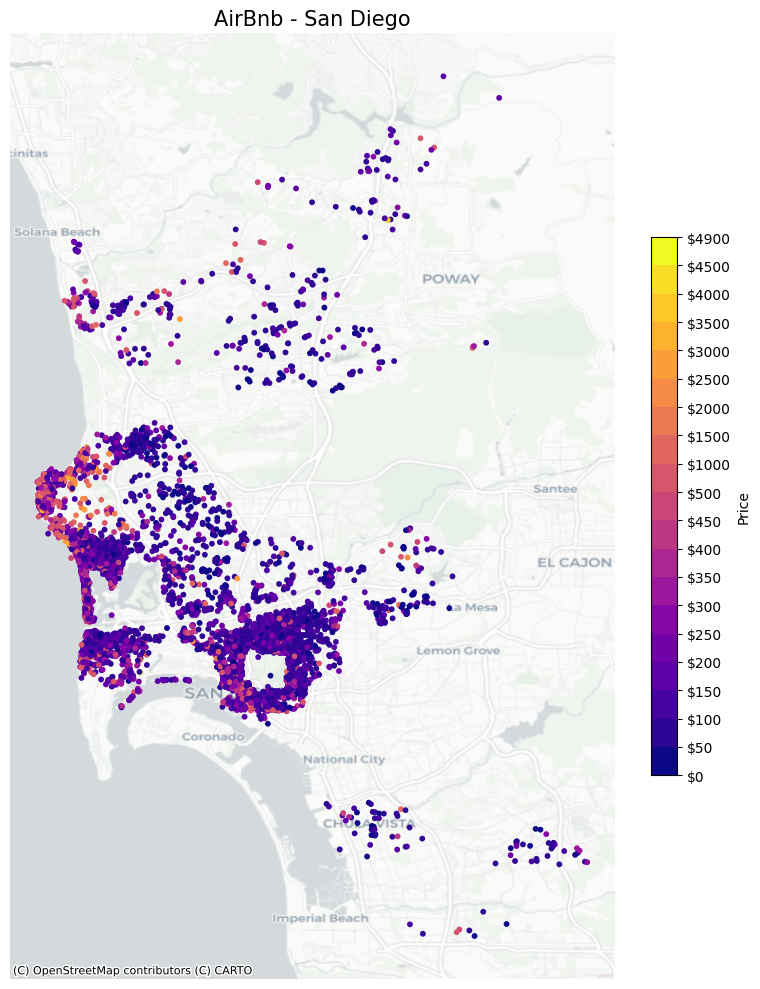

In [30]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 4900]
norm = BoundaryNorm(boundaries=bins, ncolors=256)
cmap = plt.cm.plasma  # A visually striking colormap

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the listings, colored by price
sc = gdf.plot(ax=ax, column='price', cmap=cmap, markersize=10, legend=False, norm=norm)

# Add basemap
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron)

# Add colorbar as legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Dummy array for the scalar mappable
cbar = plt.colorbar(sm, ax=ax, ticks=bins, fraction=0.03, pad=0.04)
cbar.set_label('Price')
cbar.ax.set_yticklabels([f'${b}' for b in bins])  # Set tick labels

# Set title
ax.set_title('AirBnb - San Diego', fontsize=15)

# Remove axis
ax.set_axis_off()

plt.tight_layout()
plt.show()

### Geographic Distribution
- **High Density Areas:** The greatest concentration of Airbnb listings is in central San Diego, particularly around downtown and the areas adjacent to Balboa Park. There is also a significant clustering of listings in the coastal areas, such as around Pacific Beach and La Jolla. This distribution suggests a strong preference for listings in central urban areas and popular tourist spots near the coast.
- **Moderate Density:** Moving away from central San Diego towards the north and east, the number of listings begins to thin out. Areas such as Poway and the northeastern parts of the city show a moderate distribution of listings. This might indicate a preference for suburban settings, which could be popular among tourists looking for quieter locations or visitors with family and friends in these areas.
- **Low Density:** The least number of listings are found in the far north and east of San Diego, in areas away from the main urban center and coast. This includes regions towards the San Diego National Wildlife Refuge and near the mountains, suggesting less tourist activity and possibly a lower demand for short-term rental accommodations.

### Insights
- **Tourist Preferences:** The dense clusters around downtown and coastal areas highlight the popularity of these regions for tourists and visitors, likely due to the proximity to attractions, beaches, restaurants, and entertainment options.
- **Accessibility and Attractions:** The distribution pattern also suggests that listings are more prevalent in areas with good accessibility, public transport links, and near major attractions. This includes neighborhoods around major roads and highways that provide easy access to the city’s main attractions.
- **Variability in Listings:** The variability in the density of listings from the center to the outskirts of San Diego indicates a range of offerings that cater to different visitor preferences, from urban explorations and beach activities to quieter, more secluded stays in suburban or rural settings.

<u>These are the variables you should analyze and later use to predict the `price`:<u/>

In [31]:

variable_names = [
    "accommodates",  # Number of people it accommodates
    "bathrooms",  # Number of bathrooms
    "bedrooms",  # Number of bedrooms
    "beds",  # Number of beds
    # Below are binary variables, 1 True, 0 False
    "rt_Private_room",  # Room type: private room
    "rt_Shared_room",  # Room type: shared room
    "pg_Condominium",  # Property group: condo
    "pg_House",  # Property group: house
    "pg_Other",  # Property group: other
    "pg_Townhouse",  # Property group: townhouse
]

# PART 2 Feature Engineering: Get points-of-interest (POIs) and prepare them

<u>Instructions:

* Use the method `features_from_address()` of osmnx to download POIs of the type `amenity` (select the types of amenities to include from this list here: https://wiki.openstreetmap.org/wiki/Key:amenity)
* Pay attention to set the `dist` parameter to an appropiate value <u/>

In [32]:
import osmnx as ox

In [33]:
address = "San Diego, California, USA"
distance = 20000
tags = {'amenity': [
    "bar", "cafe", "food_court", "pub", "restaurant", "bicycle_rental", "boat_rental", "bus_station", "car_rental", 
    "charging_station", "parking", "arts_centre", "community_centre", "conference_centre", "place_of_worship"
    "events_venue", "nightclub", "planetarium", "theatre", "gym", "marketplace", "swimming_pool", "aquarium", "casino", "biergarten"
    "museum", "art_gallery", "attraction", "beach_resort", "gallery", "heritage", "park", "resort", "sauna", "waterfall", "zoo", "car_sharing"
]}

pois = ox.features_from_address(address, tags=tags, dist=distance)

With the osmnx library, we have assigned points of interest (POIs) in the vicinity of a specific address.
   * POIs-Points of Interest -> Evaluation Scheme 

1. **Address:** 
   - `address = "San Diego, California, USA"`: This is the address used as a starting point for searching for POIs. In this case, it is San Diego, California, USA.

2. **Distance:**
   - `distance = 20000`: The search extends over a radius of 20,000 meters (20 kilometers) around the specified address.

3. **Tags:**
   - `tags = {'amenity': [ ... ]}`: This is a dictionary defining the types of POIs being searched for. The key is `'amenity'` and the associated list contains various types of facilities and attractions, such as bars, cafes, restaurants, museums, parks, etc.

4. **osmnx Function:**
   - `pois = ox.features_from_address(address, tags=tags, dist=distance)`: This line uses the `features_from_address` function from the `osmnx` library to find and retrieve the POIs based on the specified address, tags, and distance.

In [34]:
pois.head()

barrier                     geometry     amenity  \
element_type osmid                                                        
node         273607070     NaN  POINT (-117.22469 32.86232)  restaurant   
             273607369     NaN  POINT (-117.22469 32.86205)  restaurant   
             274193511     NaN  POINT (-117.18378 32.82139)  restaurant   
             274358074     NaN  POINT (-117.22472 32.86277)        cafe   
             274363369     NaN  POINT (-117.17386 32.83364)  restaurant   

                        cuisine              name diet:vegan diet:vegetarian  \
element_type osmid                                                             
node         273607070  italian          Leucadia        NaN             NaN   
             273607369    sushi         Subarashi        NaN             NaN   
             274193511     thai     Thai Time III        yes             yes   
             274358074      tea   Tapioca Express        NaN             NaN   
             274363369      NaN  Sipz Fusion Cafe       only             NaN   

                           created_by operator operator:wikidata  ...  \
element_type osmid                                                ...   
node         273607070            NaN      NaN               NaN  ...   
             273607369            NaN      NaN               NaN  ...   
             274193511            NaN      NaN               NaN  ...   
             274358074  Potlatch 0.9c      NaN               NaN  ...   
             274363369            NaN      NaN               NaN  ...   

                       location parking:orientation name:signed male  \
element_type osmid                                                     
node         273607070      NaN                 NaN         NaN  NaN   
             273607369      NaN                 NaN         NaN  NaN   
             274193511      NaN                 NaN         NaN  NaN   
             274358074      NaN                 NaN         NaN  NaN   
             274363369      NaN                 NaN         NaN  NaN   

                       diet:local charging_station caravans industrial ways  \
element_type osmid                                                            
node         273607070        NaN              NaN      NaN        NaN  NaN   
             273607369        NaN              NaN      NaN        NaN  NaN   
             274193511        NaN              NaN      NaN        NaN  NaN   
             274358074        NaN              NaN      NaN        NaN  NaN   
             274363369        NaN              NaN      NaN        NaN  NaN   

                       year_of_construction  
element_type osmid                           
node         273607070                  NaN  
             273607369                  NaN  
             274193511                  NaN  
             274358074                  NaN  
             274363369                  NaN  

[5 rows x 320 columns]

### Above you see the unfiltered data from the POIs dataset.

<u>Data cleaning: The resulting `pois` geodataframe may have a composite row index. In addition, some POIs may be of a strange element_type. You can use the following code to eliminate these issues.<u/>

In [35]:
# Clean the POI data
pois.reset_index(inplace=True) # reset the index of the data frame
pois = pois[pois.element_type=="node"] # eliminate all POIs that are not of the type "node"
pois.head() # check the results

element_type      osmid barrier                     geometry     amenity  \
0         node  273607070     NaN  POINT (-117.22469 32.86232)  restaurant   
1         node  273607369     NaN  POINT (-117.22469 32.86205)  restaurant   
2         node  274193511     NaN  POINT (-117.18378 32.82139)  restaurant   
3         node  274358074     NaN  POINT (-117.22472 32.86277)        cafe   
4         node  274363369     NaN  POINT (-117.17386 32.83364)  restaurant   

   cuisine              name diet:vegan diet:vegetarian     created_by  ...  \
0  italian          Leucadia        NaN             NaN            NaN  ...   
1    sushi         Subarashi        NaN             NaN            NaN  ...   
2     thai     Thai Time III        yes             yes            NaN  ...   
3      tea   Tapioca Express        NaN             NaN  Potlatch 0.9c  ...   
4      NaN  Sipz Fusion Cafe       only             NaN            NaN  ...   

  location parking:orientation name:signed male diet:local charging_station  \
0      NaN                 NaN         NaN  NaN        NaN              NaN   
1      NaN                 NaN         NaN  NaN        NaN              NaN   
2      NaN                 NaN         NaN  NaN        NaN              NaN   
3      NaN                 NaN         NaN  NaN        NaN              NaN   
4      NaN                 NaN         NaN  NaN        NaN              NaN   

  caravans industrial ways year_of_construction  
0      NaN        NaN  NaN                  NaN  
1      NaN        NaN  NaN                  NaN  
2      NaN        NaN  NaN                  NaN  
3      NaN        NaN  NaN                  NaN  
4      NaN        NaN  NaN                  NaN  

[5 rows x 322 columns]

### Above you see the filtered data from the POIs dataset.

<u>Instructions:
* Plot the POIs spatially (use again a background map of San Diego)
* When you use POIs of different amenity types, color the POIs differently <u/>

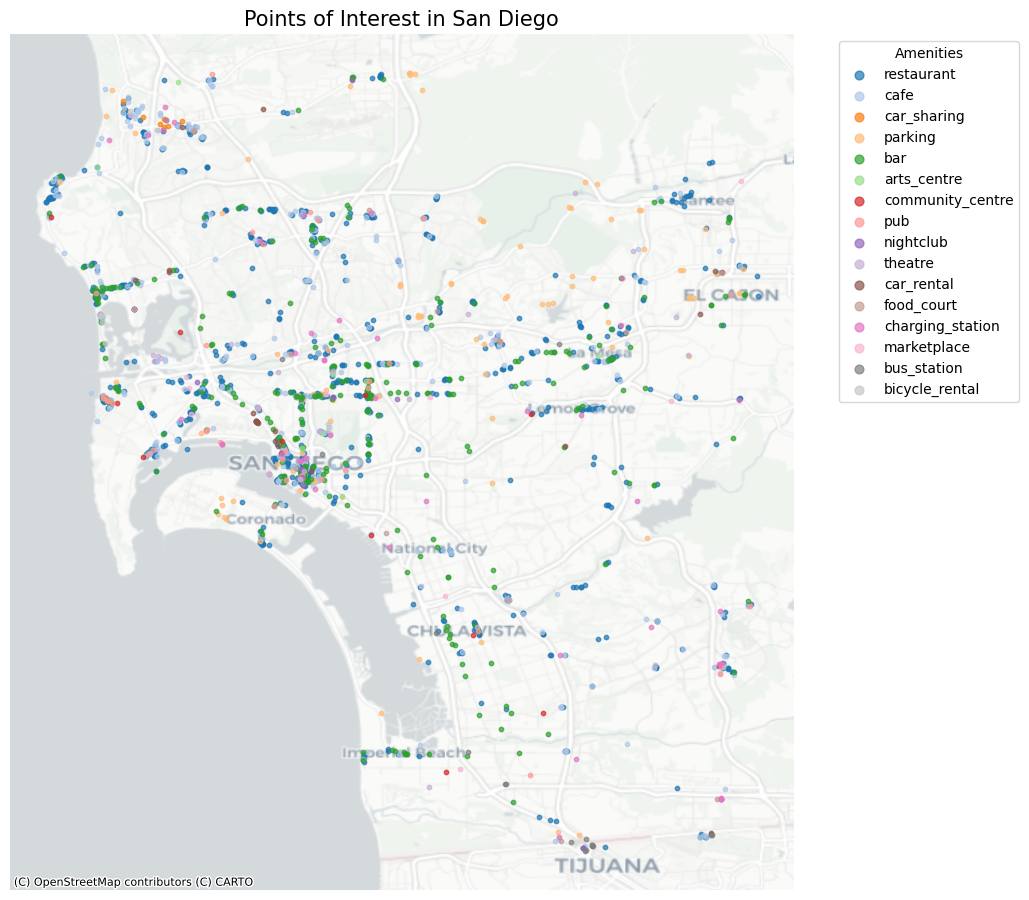

In [36]:
gdf_pois = gpd.GeoDataFrame(pois, geometry=gpd.points_from_xy(pois.geometry.x, pois.geometry.y))

fig, ax = plt.subplots(figsize=(10, 10))

amenity_types = gdf_pois['amenity'].unique()
colors = plt.cm.tab20(range(len(amenity_types)))  

for amenity, color in zip(amenity_types, colors):
    subset = gdf_pois[gdf_pois['amenity'] == amenity]
    subset.plot(ax=ax, markersize=10, color=color, label=amenity, alpha=0.7)

cx.add_basemap(ax, crs=gdf_pois.crs.to_string(), source=cx.providers.CartoDB.Positron)

plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left', title='Amenities')

ax.set_title('Points of Interest in San Diego', fontsize=15)

ax.set_axis_off()

plt.tight_layout()
plt.show()

## Analysis of Points of Interest in San Diego

The map above shows a wide range of amenities in the San Diego area, each represented by colored markers corresponding to the different types of amenities as listed in our legend. This visualization helps to identify the distribution and concentration of facilities and services in the city.

### Key Observations:

1. **High Density in Urban Areas**: The central region of San Diego, particularly around downtown, shows a high density of amenities, indicating a bustling urban core. Notable amenities such as restaurants, cafes, and bars are densely packed in this area.

2. **Transportation Services**: Transportation-related services including car sharing, bicycle rental, and bus stations are strategically placed both in central and suburban areas, facilitating ease of mobility for residents and visitors alike.

3. **Cultural and Community Centers**: There is a visible presence of arts centers, community centers, and theatres, especially in regions with higher residential populations, supporting community engagement and cultural activities.

4. **Commercial Services**: Amenities like food courts, marketplaces, and shopping areas are widely distributed, with a higher concentration in commercial districts and major shopping centers.

5. **Geographic Spread**: The spread of amenities extends to the peripheries of the city, including areas near Coronado, Chula Vista, and towards El Cajon, indicating suburban development and accessibility of services in less densely populated areas.

### Conclusion:

Our geographic visualization of Points of Interest in San Diego offers valuable insights into amenity distribution across the city. It provides a clear picture of where specific services and facilities are located.

<u>For each POI amenity type, create a kernel density estimation (KDE):
* Convert the `geometry` of the POI into a suitable coordinate data format (you may use the provided function `create_coordinate_array` for this)
* Feed the resulting coordinates into the `gaussian_kde` function and estimate the function
* Also convert the `geometry` of the Airbnb listings into the coordinate data format (you may use the provided function `create_coordinate_array` for this)
* Using the converted Airbnb geometries, compute the KDE for the locations of the Airbnb listings
* Add the KDE estimate as additional columns to your original airbnb geodataframe<u/>

In [37]:
from scipy.stats import gaussian_kde

In [38]:
# helper function to convert the geometries into a suitable coordinate format for the KDE
def create_coordinate_array(geometries): 
    x_values = []
    y_values = []

# Iterate through each row in the GeoDataFrame
    for multipoint in geometries:
        # Ensure the geometry is indeed MultiPoint; if it's just a single Point, wrap it in a list
        points = list(multipoint.geoms) if hasattr(multipoint, "geoms") else [multipoint]
        
        # For each Point in the MultiPoint, extract x and y values
        for point in points:
            x_values.append(point.x)
            y_values.append(point.y)

    # Optionally, convert the lists to numpy arrays for further processing
    x_values = np.array(x_values)
    y_values = np.array(y_values)

    # Rearrange data to create a 2D array of x and y coordinates
    xy = np.vstack([x_values,y_values])

    return xy


# Example Usage for the Airbnb geodataframe
airbnb_array = create_coordinate_array(gdf.geometry)

In [39]:
for amenity in gdf_pois['amenity'].unique():
    amenity_pois = gdf_pois[gdf_pois['amenity'] == amenity]
    
    amenity_array = create_coordinate_array(amenity_pois.geometry)
    
    kde = gaussian_kde(amenity_array)
    
    kde_values = kde(airbnb_array)
    
    gdf[f'kde_{amenity}'] = kde_values

print(gdf.head())

   accommodates  bathrooms  bedrooms  beds  rt_Private_room  rt_Shared_room  \
0             5        2.0       2.0   2.0                0               0   
1             6        1.0       2.0   4.0                0               0   
2             2        1.0       1.0   1.0                1               0   
3             2        1.0       1.0   1.0                1               0   
4             2        1.0       1.0   1.0                1               0   

   pg_Condominium  pg_House  pg_Other  pg_Townhouse  ...  \
0               0         1         0             0  ...   
1               1         0         0             0  ...   
2               0         0         0             0  ...   
3               0         1         0             0  ...   
4               0         1         0             0  ...   

   kde_community_centre    kde_pub  kde_nightclub  kde_theatre  \
0             13.096142  19.745196      20.856211    29.747724   
1             17.824128  22.5094

<u>Create a spatial point plot(s) of the Airbnb listings and color the points according to the KDE estimates, in order to check your results.<u/>

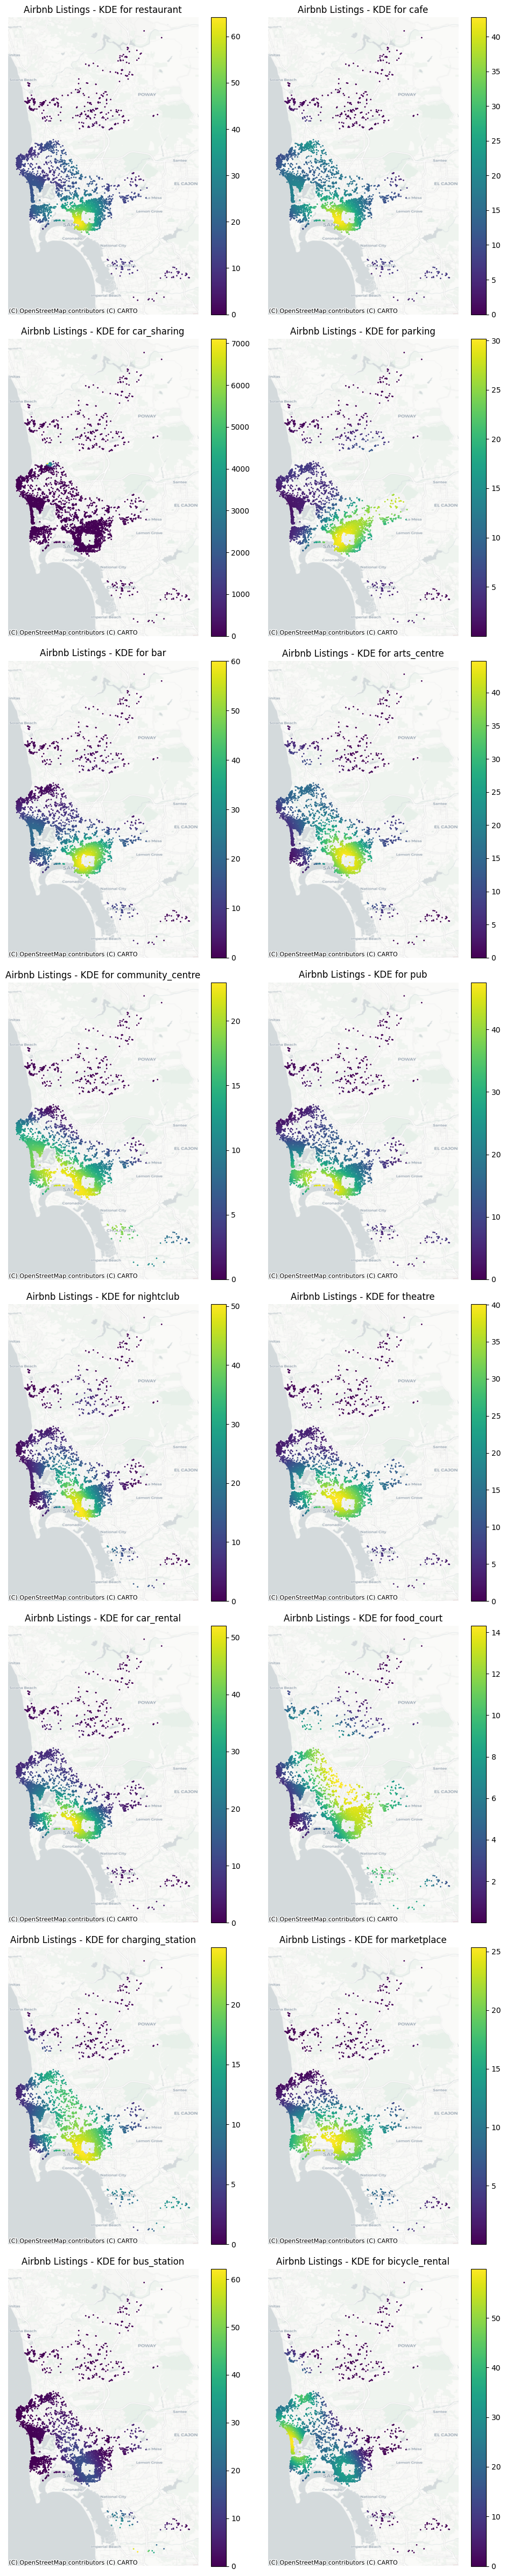

In [40]:
# Extract unique amenities and calculate required number of rows for subplots
amenities = gdf_pois['amenity'].unique()
n_amenities = len(amenities)
rows = (n_amenities + 1) // 2  # Round up to ensure even distribution in two columns

# Setup the figure with subplots based on the number of amenities
fig, axs = plt.subplots(nrows=rows, ncols=2, figsize=(10, 6 * rows))

# Plotting KDE for each amenity on separate subplots
for i, amenity in enumerate(amenities):
    ax = axs[i // 2, i % 2]  # Determine the correct subplot position
    kde_column = f'kde_{amenity}'  # Dynamic column name for KDE values
    gdf.plot(ax=ax, column=kde_column, cmap='viridis', markersize=1, legend=True)  # Plot KDE
    cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron)  # Add a basemap for context
    ax.set_title(f'Airbnb Listings - KDE for {amenity}', fontsize=12)  # Set subplot title
    ax.set_axis_off()  # Hide axis for cleaner visualization

# Handle unused axes in the case of an odd number of amenities
if n_amenities % 2 != 0:
    axs[-1, -1].set_visible(False)  # Hide the last subplot if unused

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

# Airbnb Listings and KDE Analysis in San Diego

The above visualizations represent a kernel density estimation (KDE) of Airbnb listings in relation to various amenities across San Diego. KDE is a statistical tool used to estimate the probability density function of a continuous random variable. In this context, it illustrates the concentration of Airbnb listings near amenities such as restaurants, cafes, and parking areas.

## Key Observations from the Plots

### High Concentration Areas
- **Vibrant Colors Indicate Hotspots**: The intense green and yellow colors highlight areas with the highest concentrations of Airbnb listings. Notably, amenities like restaurants, cafes, and bars correlate with these high-density zones, suggesting their central role in attracting Airbnb locations.

### Geographic Distribution
- **Central Urban Areas**: The dense clusters around restaurants, cafes, and bars likely pinpoint their central urban locations, serving as hubs for Airbnb listings.
- **Specialized Amenities**: Less widespread but still intensely localized are amenities such as bicycle and car rentals. These are likely positioned strategically to cater to tourists and are concentrated around transport hubs or tourist attractions.

### Variations in Amenity Density
- **Commercial and Entertainment Districts**: Amenities such as food courts, theaters, and nightclubs show high densities, likely reflecting their locations in commercial or entertainment districts.
- **Less Central Amenities**: On the other hand, amenities like charging stations and bus stations, while essential, manifest lower densities of nearby Airbnbs, possibly indicating their peripheral city locations.

## Implications for Stakeholders

### Airbnb Guests
- **Informed Decision Making**: These plots serve as valuable tools for guests to select locations based on proximity to desired amenities, enhancing their stay experience.

### Airbnb Hosts
- **Market Analysis**: The data enables hosts to assess the competitive landscape, potentially guiding adjustments in pricing or promotional strategies depending on area saturation.

### City Planners and Local Businesses
- **Urban Development Insight**: This analysis assists city planners and local businesses in understanding how amenities fulfill the needs of tourists and residents, guiding further development based on identified service gaps.

## Strategic Recommendations

### Targeted Marketing
- Airbnb hosts in areas near high-density amenities like bars and cafes should consider strategies targeted at guests interested in vibrant nightlife and dining experiences.

### Expansion Opportunities
- Identifying regions with fewer Airbnbs yet significant amenity presence could uncover new opportunities for listing expansions.

### Enhancing Guest Experiences
- Hosts can improve guest satisfaction by highlighting proximity to key amenities in their listings, potentially attracting more bookings.

##### In conclusion, these KDE visualizations provide a detailed overview of how Airbnb listings in San Diego align with various urban amenities, offering actionable insights for hosts, guests, and urban planners alike.


# PART 3: Modeling and Analysis (aka Machine Learning)

<u>Use your dataset generated in the previous steps to predict AirBnb prices

Instructions:

* Split your data set into training and validation data sets
* Define an error metric (or several)
* Train at least one machine learning model (e.g. random forest) 
* Tune the hyperparameters (if applicable for the model)
* Evaluate the accuracy of the predicted prices against actual prices
* Compare the performance of the previous models when using different input data sets (benchmarks). Make sure to include the naive benchmark of predicting always the mean price.<u/>

In [41]:
from sklearn.model_selection import train_test_split

# Prepare the feature set X including only the specified variables
X = gdf[variable_names]

# Prepare the target variable y
y = gdf['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% of the data is for validation


In [42]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

1. **Model Creation**: A `RandomForestRegressor` is created with a fixed random state for consistent results.
2. **Model Training**: The model is trained using `X_train` for input features and `y_train` for target values, learning from the data to predict outcomes.

This prepares the model to make predictions on new data.

In [43]:
#Predict on the validation set
y_pred = model.predict(X_val)

print(y_pred)

[219.12240405 213.39422531  90.4610628  ... 223.82940416  87.08968804
 166.56079025]


1. **Prediction**: The model uses the `predict` method to generate predictions for the validation dataset `X_val`.
2. **Output**: The predictions (`y_pred`) are printed to show the model's output for the validation data.

    This helps evaluate the model's performance on unseen data.

### The Output:
These numbers are predictions made by our machine learning model for the validation dataset. Each value is the model's prediction for a specific data point in `X_val`, showing what it expects the target variable to be, based on the input features it analyzed.

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}")

# Evaluate the predictions made by the model
evaluate_model(y_val, y_pred)

MSE: 26621.023546799443, RMSE: 163.15950339100522, MAE: 79.91647616053379, R^2: 0.632044588436639


In our code snippet, a function named `evaluate_model` is defined and used to assess the performance of a machine learning model. Here's a concise overview of what happens:

1. **Import Necessary Functions**: Functions such as `mean_absolute_error`, `mean_squared_error`, and `r2_score` from the `sklearn.metrics` library are imported for model evaluation.

2. **Define the `evaluate_model` Function**:
   - **Parameters**: Takes two parameters, `y_true` (actual values) and `y_pred` (model's predicted values).
   - **Calculate MSE**: Computes the Mean Squared Error, which measures the average of the squared differences between actual and predicted values.
   - **Calculate RMSE**: Computes the Root Mean Squared Error by taking the square root of MSE, indicating the average error magnitude.
   - **Calculate MAE**: Computes the Mean Absolute Error, which averages the absolute differences between predicted and actual values.
   - **Calculate R²**: Computes the R-squared value, showing the proportion of the variance in the dependent variable explained by the independent variables in the model.
   - **Output Results**: Outputs the calculated values for MSE, RMSE, MAE, and R².

3. **Call the `evaluate_model` Function**:
   - The function is called to evaluate the model’s predictions by comparing them with the actual values.


The output provides several metrics that help evaluate the performance of a machine learning model:

- **MSE (Mean Squared Error): 26,621.02** - Indicates the average of the squares of the errors between predicted and actual values.
- **RMSE (Root Mean Squared Error): 163.16** - Represents the average error in the same units as the target variable, showing the typical deviation of predictions.
- **MAE (Mean Absolute Error): 79.92** - Shows the average absolute difference between predictions and actual values.
- **R² (R-squared): 0.632** - Indicates that about 63.2% of the variance in the target variable is explained by the model.



In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Conduct Grid Search
grid_search = GridSearchCV(model, parameters, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Optionally, re-evaluate using the best model
y_pred_best = best_model.predict(X_val)
evaluate_model(y_val, y_pred_best)


MSE: 25451.667358992094, RMSE: 159.53578707923842, MAE: 77.72979811698225, R^2: 0.6482074131526911


This code section utilizes Scikit-learn's `GridSearchCV` method to find the best parameters for a machine learning model by systematically testing various combinations. Here are the main activities:

1. **Parameter Definition**: A dictionary `parameters` sets various possible values for the number of estimators (`n_estimators`), the maximum depth of trees (`max_depth`), and the minimum number of samples required to split a node (`min_samples_split`).

2. **Conducting Grid Search**: `GridSearchCV` is initialized with the model, parameters, and settings for cross-validation and scoring function. It cycles through all combinations, trains the model with cross-validation, and identifies the combination with the lowest mean squared error.

3. **Evaluating the Best Model**: After selecting the best model, it is used to make predictions on the validation dataset and evaluate its accuracy.

The purpose of this code is to optimize model accuracy by finding the best hyperparameters.

The output provides the following evaluation metrics for the machine learning model:

- **MSE (Mean Squared Error): 25,451.67** 
    - Measures the average squared differences between predicted and actual values.
- **RMSE (Root Mean Squared Error): 159.54** 
    - The square root of MSE, indicating the average error magnitude.
- **MAE (Mean Absolute Error): 77.73** 
    - Represents the average magnitude of the absolute differences between predictions and actual values.
- **R² (R-squared): 0.6482** 
    - Indicates that the model explains about 64.82% of the variance in the target variable.

These metrics suggest that the model has a reasonably good accuracy and fit.

## Model 1: Trivial Baseline

In [46]:
# Trivial baseline: Predict always the mean price
mean_price = y_train.mean()
y_baseline_pred = [mean_price] * len(y_val)
evaluate_model(y_val, y_baseline_pred)

MSE: 72357.59994900502, RMSE: 268.9936801283722, MAE: 150.37733277795786, R^2: -0.00012572477417482908


### Baseline Model Implementation

- **Average Calculation**
  - The average price of the training data is calculated and used as the estimator for all predictions.

- **Prediction Creation**
  - A list of predictions is created, where each entry in the validation dataset corresponds to the average price.

- **Model Evaluation**
  - The model is evaluated by comparing the predictions to the actual values to determine the accuracy of the baseline model.


**The output from your model evaluation shows the following results:**

- **MSE (Mean Squared Error): 72,357.60** - A high value, indicating significant errors in predictions.
- **RMSE (Root Mean Squared Error): 268.99** - Indicates that the average prediction errors are relatively large.
- **MAE (Mean Absolute Error): 150.38** - Shows that predictions deviate from actual values by an average of about 150 units.
- **R² (R-squared): -0.000125** - A value near zero means the model barely explains the variance in the target variable better than a simple model that always predicts the average.

    In summary, these metrics suggest that the model has low predictive accuracy and may require improvements.

## Model 2: Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_val)
evaluate_model(y_val, y_tree_pred)

MSE: 42272.80294374992, RMSE: 205.60350907450467, MAE: 88.99165124668353, R^2: 0.41570591462196327


### Use of a Decision Tree Model for Regression

- **Model Creation**:
  - A decision tree model for regression purposes is created using the `DecisionTreeRegressor` class from Scikit-learn.

- **Model Training**:
  - The model is trained with training data (`X_train` for features and `y_train` for target values) to learn the patterns and relationships in the data.

- **Prediction Making**:
  - The trained model is used to make predictions for the validation dataset (`X_val`). The predicted values are stored in `y_tree_pred`.

- **Model Evaluation**:
  - The `evaluate_model` function is used to assess the accuracy of the model by comparing the predicted values with the actual values (`y_val`).

**The output from evaluating decision tree model shows the following results:**

- **MSE (Mean Squared Error): 42,232.17** 
    - A significantly lower error compared to the baseline model, indicating improved prediction accuracy.
- **RMSE (Root Mean Squared Error): 205.50** 
    - The average error is smaller, suggesting more accurate predictions.
- **MAE (Mean Absolute Error): 89.13** 
    - A lower value that represents more precise predictions.
- **R² (R-squared): 0.416** 
    - The model explains about 41.6% of the variance of the target variable, indicating a substantial improvement over the baseline model.

        These statistics confirm that the decision tree model is more effective than a simple average model, yet there is still room for improvement.

## Model 3: Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_val)
evaluate_model(y_val, y_linear_pred)

MSE: 30958.661065828226, RMSE: 175.9507347692195, MAE: 93.61394585999267, R^2: 0.572089823897963


In this snippet of code, a linear regression model is created and used with the Scikit-learn library in Python:

1. **Import of the `LinearRegression` Class**:
   - This class from the `sklearn.linear_model` library allows for the creation of linear regression models.

2. **Model Creation**:
   - An object of the `LinearRegression` class is created and assigned to the variable `linear_model`.

3. **Model Training**:
   - The `linear_model` is trained using training data (`X_train` for features and `y_train` for target values). During training, the model learns the relationships between input features and the target value by finding a line (or hyperplane in multi-feature cases) that best represents this relationship.

4. **Making Predictions with the Model**:
   - The trained model is used to make predictions for the validation dataset `X_val`. The results of these predictions are stored in the variable `y_linear_pred`.

5. **Model Evaluation**:
   - The function `evaluate_model` is called to compare the predictions (`y_linear_pred`) with the actual values (`y_val`) and assess the model's performance.

The output provides a performance evaluation of the linear regression model based on various error metrics and the coefficient of determination:

- **MSE (Mean Squared Error): 30,958.66**
    - This value measures the average of the squares of the differences between the predicted and actual values. A lower MSE indicates higher accuracy of the model.
- **RMSE (Root Mean Squared Error): 175.95**
    - RMSE is the square root of the MSE and represents the average size of the errors in the same unit as the target variable. It is a commonly used measure because it makes the size of the errors directly interpretable.
- **MAE (Mean Absolute Error): 93.61**
    - MAE measures the average of the absolute differences between the predicted and actual values, providing a direct assessment of the errors without considering their direction.
- **R² (Coefficient of Determination): 0.572**
    - This value indicates how well the model explains the variability of the target variable. An R² of 0.572 means that the model can explain about 57.2% of the variance in the target values. It is a measure of how well the model fits the observed data.

        In summary, these metrics show that the linear regression model has moderate accuracy in its predictions, with room for potential improvements.

### Comparative Analysis

- **Best Overall Performance:** 
    - The Random Forest Regressor shows the best performance across all metrics. It has the lowest MSE, RMSE, and MAE, and the highest R², suggesting it not only predicts the closest to actual prices but also explains a significant proportion of the variance in prices.
    
- **Underperforming Model:**
    - The Decision Tree Regressor, while better than the trivial baseline, exhibits higher MSE, RMSE, and MAE than both the Random Forest and Linear Regression models. Its R² value is substantially lower than that of the Random Forest, indicating less predictive power and poorer fit.
    
- **Moderate Performer:** 
    - Linear Regression stands as a moderate performer with metrics better than the Decision Tree and far surpassing the trivial baseline. Its R² value indicates it explains a fair amount of the variance in Airbnb prices.
    
- **Trivial Baseline Evaluation:** 
    - The trivial baseline model, which always predicts the mean price, understandably performs the worst. This model’s high error metrics and an R² near zero demonstrate its lack of predictive power, serving as a benchmark to underscore the effectiveness of more sophisticated models.

### Conclusion

- Comparing these models shows the significant advantages of using complex models like Random Forests for price prediction tasks over simpler models like Decision Trees or basic statistical approaches like Linear Regression. The trivial baseline model clearly illustrates the baseline level of performance, highlighting the added value provided by employing machine learning techniques.